# Workbook 00 - Solving beams with `PyNite`

In [40]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

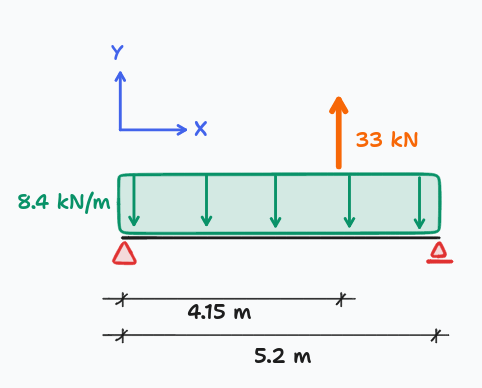

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |  Sum MZ  |  Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+
|       LC1        |   0    |   0    | -1.07e+04 | 1.07e+04 |   0    |   0    |   0    |    0    |   0    |    0    | 2.34e+07 | -2.34e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+----------+-----------+

{'LC1': 15176.538461538461}
{'LC1': -4496.538461538461}


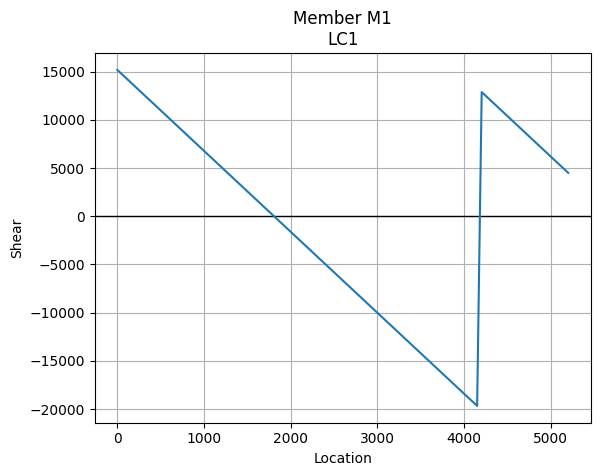

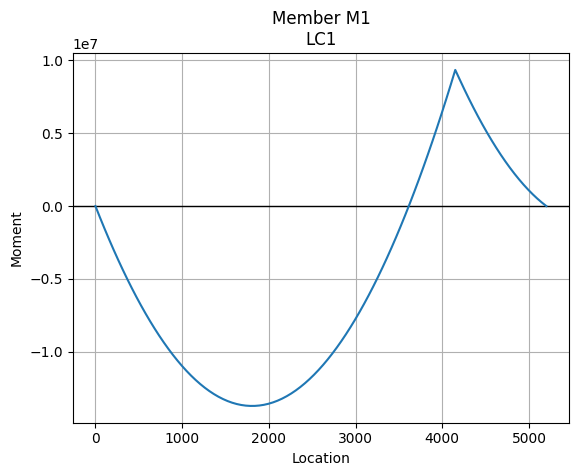

In [41]:
# Task 01 response is below
beam_model_1 =FEModel3D()
beam_model_1.add_node("n0", 0, 0 ,0)
beam_model_1.add_node("n1",5200,0,0)
beam_model_1.add_member(name="M1", i_node="n0", j_node="n1", E=23e3, G=77e3, Iy=20e6, Iz=400e6, J=30e3, A=1500)
beam_model_1.def_support("n0", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model_1.def_support("n1", support_DY=True)
beam_model_1.add_load_combo('LC1', {'D' : 1, 'L' : 1})
beam_model_1.add_member_pt_load("M1", "Fy", 33000, x=4150, case = 'L')
beam_model_1.add_member_dist_load("M1", "Fy", -8.4, -8.4, 0, 5200, case ='D')
beam_model_1.analyze(check_statics=True) 
print(beam_model_1.Nodes['n0'].RxnFY)
print(beam_model_1.Nodes['n1'].RxnFY)
beam_model_1.Members['M1'].plot_shear("Fy", combo_name ='LC1', n_points =100)
beam_model_1.Members['M1'].plot_moment("Mz", combo_name ='LC1', n_points =100)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -4.07e+05 | 4.07e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -8.03e+08 | 8.03e+08 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+

{'LC1': 407200.0}
{'LC1': -10.568821947873799}


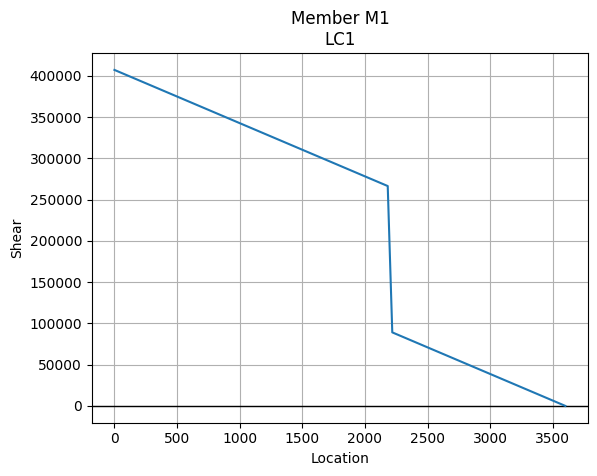

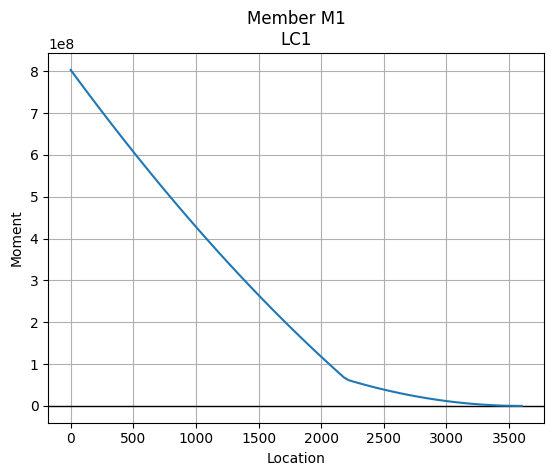

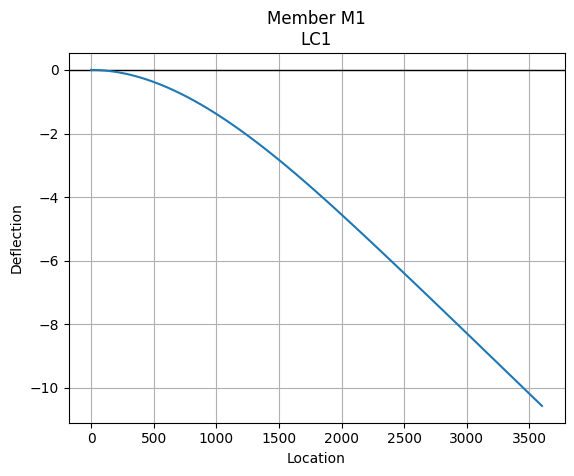

In [42]:
# Task 02 response is below
beam_model_2 =FEModel3D()
beam_model_2.add_node("n0", 0, 0 ,0)
beam_model_2.add_node("n1",3600,0,0)
beam_model_2.add_member(name="M1", i_node="n0", j_node="n1", E=45e3, G=17e3, Iy=1/12*600*300**3, Iz=1/12*300*600**3, J=30e3, A=300*600)
beam_model_2.def_support("n0", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=True, support_RZ=True)
beam_model_2.add_load_combo('LC1', {'D' : 1, 'L' : 1})
SW = 0.3*0.6*25 # kN/m
beam_model_2.add_member_pt_load("M1", "Fy", -175000, x=2200, case = 'L')
beam_model_2.add_member_dist_load("M1", "Fy", -SW, -SW, 0, 3600, case ='D')
beam_model_2.add_member_dist_load("M1", "Fy", -60, -60, 0, 3600, case ='L')
beam_model_2.analyze(check_statics=True) 
print(beam_model_2.Nodes['n0'].RxnFY)
print(beam_model_2.Nodes['n1'].DY)
beam_model_2.Members['M1'].plot_shear("Fy", combo_name ='LC1', n_points =100)
beam_model_2.Members['M1'].plot_moment("Mz", combo_name ='LC1', n_points =100)
beam_model_2.Members['M1'].plot_deflection("dy", combo_name ='LC1', n_points =100)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -3.15e+04 | 3.15e+04 |   0    |   0    |   0    |    0    |   0    |    0    | -4.07e+07 | 4.07e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+

{'LC1': 17015.108041297077}
{'LC1': 19752.1460290473}
{'LC1': -5287.254070344374}


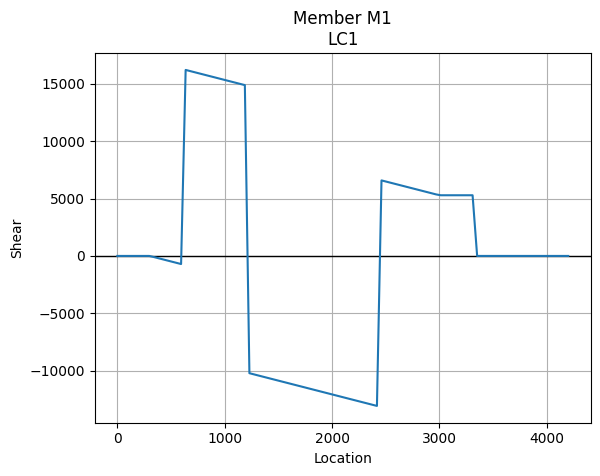

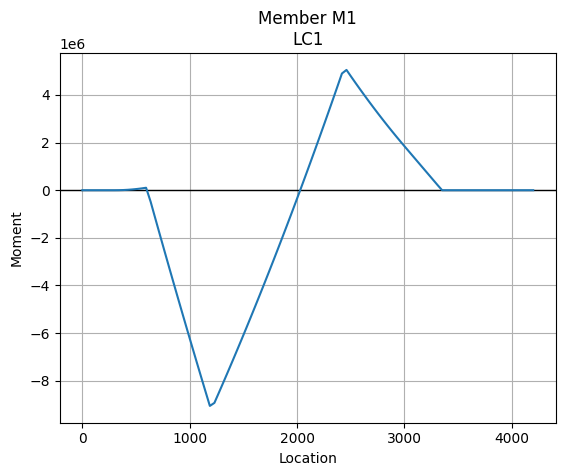

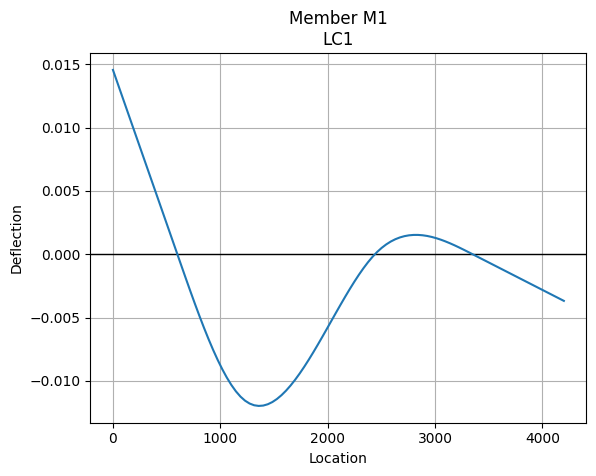

In [43]:
# Task 03 response is below
beam_model_3 =FEModel3D()
beam_model_3.add_node("n0", 0, 0 ,0)
beam_model_3.add_node("n1", 600, 0 ,0)
beam_model_3.add_node("n2", 2440, 0 ,0)
beam_model_3.add_node("n3", 3350, 0 ,0)
beam_model_3.add_node("n4",4200,0,0)
beam_model_3.add_member(name="M1", i_node="n0", j_node="n4", E=200e3, G=17e3, Iy=1/12*600*300**3, Iz=854e6, J=30e3, A=300*600)
beam_model_3.def_support("n1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True,)
beam_model_3.def_support("n2", support_DX=True, support_DY=True, support_DZ=True)
beam_model_3.def_support("n3", support_DX=False, support_DY=True, support_DZ=True)
beam_model_3.add_load_combo('LC1', {'L' : 1})
beam_model_3.add_member_pt_load("M1", "Fy", -25000, x=1200, case = 'L')
beam_model_3.add_member_dist_load("M1", "Fy", -2.4, -2.4, 300, 3000, case ='L')
beam_model_3.analyze(check_statics=True) 
print(beam_model_3.Nodes['n1'].RxnFY)
print(beam_model_3.Nodes['n2'].RxnFY)
print(beam_model_3.Nodes['n3'].RxnFY)
beam_model_3.Members['M1'].plot_shear("Fy", combo_name ='LC1', n_points =100)
beam_model_3.Members['M1'].plot_moment("Mz", combo_name ='LC1', n_points =100)
beam_model_3.Members['M1'].plot_deflection("dy", combo_name ='LC1', n_points =100)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.